# **EDA**

   
FER2013 Emotion Dataset for Music Recommendation System
- Input: 7 emotion classes (from FER2013)
- Output: 5 final classes (after mapp - angry, happy, sad, stressed, neutral)ng)
- Imagze Si35,887 grayscale 48×48 facial imagescale
- Model: EfficientNe4xed) RGB)


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings("ignore")

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1.Mapping

In [2]:
data_path = '/app/data/raw/fer2013'
PROCESSED_DIR = Path("/app/data/processed/FC211002_Nethmi")
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

print(f"Raw data directory: {data_path}")
print(f"Processed data directory: {PROCESSED_DIR}")

Raw data directory: /app/data/raw/fer2013
Processed data directory: /app/data/processed/FC211002_Nethmi


In [3]:
print("Checking if train and test folders exist:")
print("Train exists?", os.path.exists(os.path.join(data_path, "train")))
print("Test exists?", os.path.exists(os.path.join(data_path, "test")))

Checking if train and test folders exist:
Train exists? True
Test exists? True


In [4]:
#  Print class distribution for both train and test sets
def print_class_distribution():
    
    print("\nCLASS DISTRIBUTION REPORT\n" + "-"*60)

    # Loop through both train and test splits
    for split in ['train', 'test']:
        print(f"\n{split.upper()} SET ANALYSIS:\n" + "-"*40)
        split_path = os.path.join(data_path, split)
        total = 0
        class_counts = {}   # dict to store per-class counts

        # Count images for each class in this split
        for cls in emotion_labels:
            cls_path = os.path.join(split_path, cls)
            count = len(os.listdir(cls_path))    # number of images in this class
            class_counts[cls] = count
            total += count

        
        for cls in emotion_labels:
            print(f"  {cls:<9}: {class_counts[cls]:>5} images")
            
        print(f"  TOTAL     : {total} images")

print_class_distribution()


CLASS DISTRIBUTION REPORT
------------------------------------------------------------

TRAIN SET ANALYSIS:
----------------------------------------
  angry    :  3995 images
  disgust  :   436 images
  fear     :  4097 images
  happy    :  7215 images
  neutral  :  4965 images
  sad      :  4830 images
  surprise :  3171 images
  TOTAL     : 28709 images

TEST SET ANALYSIS:
----------------------------------------
  angry    :   958 images
  disgust  :   111 images
  fear     :  1024 images
  happy    :  1774 images
  neutral  :  1233 images
  sad      :  1247 images
  surprise :   831 images
  TOTAL     : 7178 images


In [5]:
# Class mapping
print("Defining class mappings...")
project_mapping = {
    'angry': 'angry',
    'disgust': 'angry',     # merge 'disgust' into 'angry'
    'fear': 'stressed',    # map 'fear' into 'stressed'
    'happy': 'happy',
    'sad': 'sad',
    'surprise': 'stressed',   # merge 'surprise' into 'stressed'
    'neutral': 'neutral'
}
print("Project-specific emotion mapping defined.\n")
print("FER2013 → Project Mapped Classes:")
for original, mapped in project_mapping.items():
    print(f"  {original:<10} → {mapped}")

original_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

final_classes = ['angry', 'happy', 'sad', 'stressed', 'neutral']

print("\n ")
print(" Original FER2013 Classes     :", original_classes)

print("\n Final Classes Used in Project:", final_classes)



Defining class mappings...
Project-specific emotion mapping defined.

FER2013 → Project Mapped Classes:
  angry      → angry
  disgust    → angry
  fear       → stressed
  happy      → happy
  sad        → sad
  surprise   → stressed
  neutral    → neutral

 
 Original FER2013 Classes     : ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

 Final Classes Used in Project: ['angry', 'happy', 'sad', 'stressed', 'neutral']


## 2.Initial EDA

### 2.1 Original vs Mapped Class Distributions

In [6]:
# Class Distributions
def compute_class_distributions():
    
    original_dist = {'train': defaultdict(int), 'test': defaultdict(int)}
    mapped_dist = {'train': defaultdict(int), 'test': defaultdict(int)}

    #loop through both training and testing datasets
    for split in ['train', 'test']:
        print(f"\nAnalyzing '{split}' set....")
        split_path = os.path.join(data_path, split)

        #Loop through each class folder in the split
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)

            # Check if the path is a directory
            if os.path.isdir(cls_path):

                #count image files with valid extensions
                count = len([
                    f for f in os.listdir(cls_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])

                #update original class distribution
                original_dist[split][cls] += count
                mapped_cls = project_mapping.get(cls)
                if mapped_cls:
                    mapped_dist[split][mapped_cls] += count
                
                # print(f"  • Found {count} images in '{cls}' → Mapped to '{mapped_cls}'")

    # print("\nFinished computing class distributions.")
    return original_dist, mapped_dist

original_dist, mapped_dist = compute_class_distributions()

# summary of mapped class distributions with totals
print("\nSummary of Mapped Class Distribution:")
for split in ['train', 'test']:
    print(f"\n{split.upper()} SET:")
    total_images = 0
    for cls, count in mapped_dist[split].items():
        #Print each class and its image count
        print(f"  {cls:<10}: {count} images")
        total_images += count
    print(f"  {'TOTAL':<10}: {total_images} images")


Analyzing 'train' set....

Analyzing 'test' set....

Summary of Mapped Class Distribution:

TRAIN SET:
  angry     : 4431 images
  stressed  : 7268 images
  happy     : 7215 images
  neutral   : 4965 images
  sad       : 4830 images
  TOTAL     : 28709 images

TEST SET:
  angry     : 1069 images
  stressed  : 1855 images
  happy     : 1774 images
  neutral   : 1233 images
  sad       : 1247 images
  TOTAL     : 7178 images


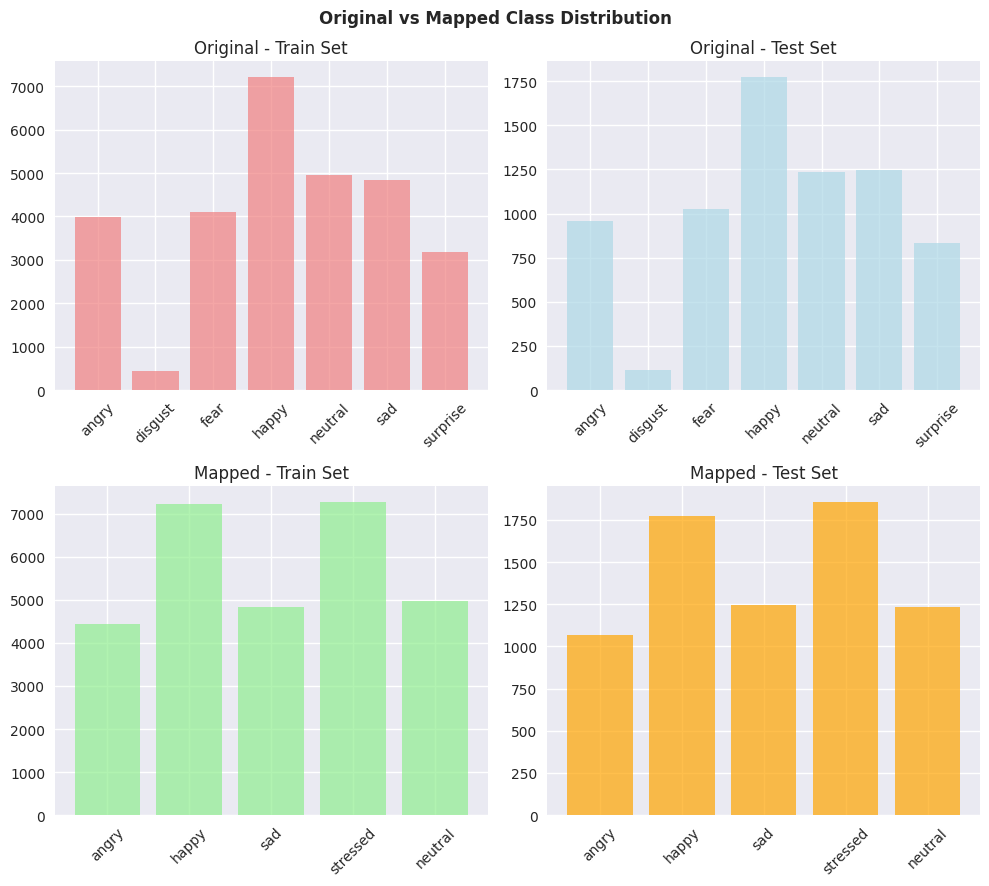

In [7]:
#Original vs Mapped Class Plots Distribution

def plot_class_comparison():
    # Compute distributions
    original_dist = {'train': defaultdict(int), 'test': defaultdict(int)}
    mapped_dist = {'train': defaultdict(int), 'test': defaultdict(int)}
    
    for split in ['train', 'test']:
        for cls in emotion_labels:
            cls_path = os.path.join(data_path, split, cls)
            count = len(os.listdir(cls_path))
            original_dist[split][cls] = count
            mapped_cls = project_mapping[cls]
            mapped_dist[split][mapped_cls] += count
    
    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(10, 9))
    fig.suptitle('Original vs Mapped Class Distribution', fontsize=12, fontweight='bold')
    
    # Original classes
    train_orig = [original_dist['train'][cls] for cls in emotion_labels]
    test_orig = [original_dist['test'][cls] for cls in emotion_labels]
    
    axes[0,0].bar(emotion_labels, train_orig, color='lightcoral', alpha=0.7)
    axes[0,0].set_title('Original - Train Set')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    axes[0,1].bar(emotion_labels, test_orig, color='lightblue', alpha=0.7)
    axes[0,1].set_title('Original - Test Set')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Mapped classes
    train_mapped = [mapped_dist['train'][cls] for cls in final_classes]
    test_mapped = [mapped_dist['test'][cls] for cls in final_classes]
    
    axes[1,0].bar(final_classes, train_mapped, color='lightgreen', alpha=0.7)
    axes[1,0].set_title('Mapped - Train Set')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    axes[1,1].bar(final_classes, test_mapped, color='orange', alpha=0.7)
    axes[1,1].set_title('Mapped - Test Set')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    return mapped_dist

mapped_dist = plot_class_comparison()

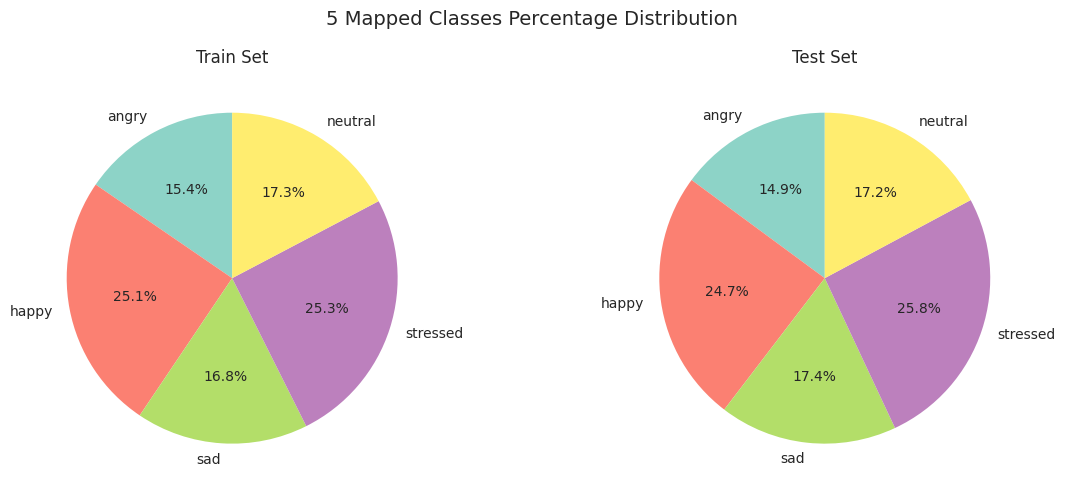

In [8]:
#Mapped Classes Percentage Distribution - Pie Chart

def plot_pie_chart(mapped_dist):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('5 Mapped Classes Percentage Distribution', fontsize=14)
    
    colors = plt.cm.Set3(np.linspace(0, 1, 5))
    
    # Train set
    train_counts = [mapped_dist['train'][cls] for cls in final_classes]
    axes[0].pie(train_counts, labels=final_classes, autopct='%1.1f%%', 
                colors=colors, startangle=90)
    axes[0].set_title('Train Set')
    
    # Test set
    test_counts = [mapped_dist['test'][cls] for cls in final_classes]
    axes[1].pie(test_counts, labels=final_classes, autopct='%1.1f%%', 
                colors=colors, startangle=90)
    axes[1].set_title('Test Set')
    
    plt.tight_layout()
    plt.show()

plot_pie_chart(mapped_dist)

### 2.2 Sample Images Grid

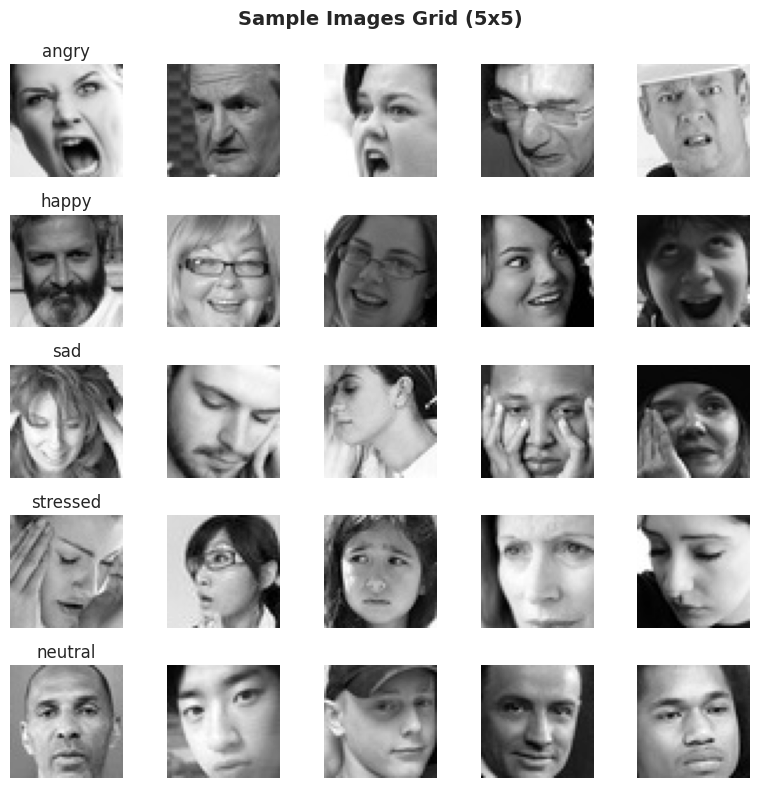

In [9]:
def create_sample_grid():
    fig, axes = plt.subplots(5, 5, figsize=(8, 8))
    fig.suptitle('Sample Images Grid (5x5)', fontsize=14, fontweight='bold')
    
    np.random.seed(42)
    
    for row, cls in enumerate(final_classes):
        # Get sample images for this class
        sample_images = []
        for orig_cls, mapped_cls in project_mapping.items():
            if mapped_cls == cls:
                cls_path = os.path.join(data_path, 'train', orig_cls)
                images = os.listdir(cls_path)[:20]
                sample_images.extend([(cls_path, img) for img in images])
        
        # Select 5 random samples
        selected = np.random.choice(len(sample_images), min(5, len(sample_images)), replace=False)
        
        for col in range(5):
            if col < len(selected):
                img_path, img_name = sample_images[selected[col]]
                full_path = os.path.join(img_path, img_name)
                img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
                axes[row, col].imshow(img, cmap='gray')
                if col == 0:  # Label only first column
                    axes[row, col].set_title(cls, fontsize=12 )
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

create_sample_grid()

### 2.3 Class Imbalance Analysis


 CLASS IMBALANCE ANALYSIS
----------------------------------------


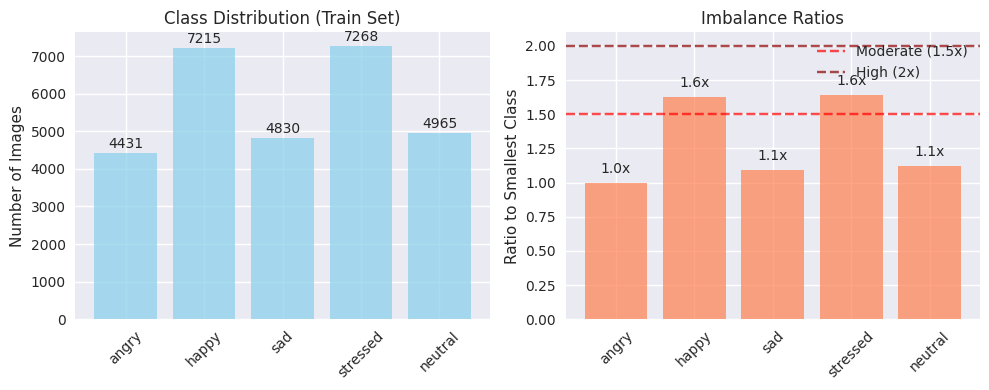


Class Distribution Summary:
angry     :  4431 images (1.0x)
happy     :  7215 images (1.6x)
sad       :  4830 images (1.1x)
stressed  :  7268 images (1.6x)
neutral   :  4965 images (1.1x)

Imbalance Range: 4431 - 7268 images
Max Imbalance Ratio: 1.6x


Imbalance Severity: MODERATE
Solution: Use class weights or mild data augmentation


In [10]:
def analyze_imbalance(mapped_dist):
    print("\n CLASS IMBALANCE ANALYSIS")
    print("-"*40)
    
    # Get train counts
    train_counts = [mapped_dist['train'][cls] for cls in final_classes]
    min_count = min(train_counts)
    max_count = max(train_counts)
    
    # Calculate ratios
    ratios = [count/min_count for count in train_counts]
    
    # Simple bar plot
    plt.figure(figsize=(10, 4))
    
    # Plot 1: Class counts
    plt.subplot(1, 2, 1)
    bars = plt.bar(final_classes, train_counts, color='skyblue', alpha=0.7)
    plt.title('Class Distribution (Train Set)')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    
    # Add count labels on bars
    for bar, count in zip(bars, train_counts):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
                f'{count}', ha='center', va='bottom')
    
    # Plot 2: Imbalance ratios
    plt.subplot(1, 2, 2)
    bars = plt.bar(final_classes, ratios, color='coral', alpha=0.7)
    plt.title('Imbalance Ratios')
    plt.ylabel('Ratio to Smallest Class')
    plt.axhline(y=1.5, color='red', linestyle='--', alpha=0.7, label='Moderate (1.5x)')
    plt.axhline(y=2.0, color='darkred', linestyle='--', alpha=0.7, label='High (2x)')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Add ratio labels
    for bar, ratio in zip(bars, ratios):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                f'{ratio:.1f}x', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\nClass Distribution Summary:")
    for i, cls in enumerate(final_classes):
        print(f"{cls:<10}: {train_counts[i]:>5} images ({ratios[i]:.1f}x)")
    
    print(f"\nImbalance Range: {min_count} - {max_count} images")
    print(f"Max Imbalance Ratio: {max(ratios):.1f}x")
    
    # Determine severity and solutions
    max_ratio = max(ratios)
    if max_ratio < 1.5:
        severity = "LOW"
        solution = "No action needed"
    elif max_ratio < 2.0:
        severity = "MODERATE" 
        solution = "Use class weights or mild data augmentation"
    else:
        severity = "HIGH"
        solution = "Data augmentation + class weights recommended"
    print("\n")
    print(f"Imbalance Severity: {severity}")
    print(f"Solution: {solution}")
    

# Run analysis
analyze_imbalance(mapped_dist)

### 2.4 Image Quality Analysis 

In [12]:
# Thresholds 
DARK_THRESHOLD = 50
BRIGHT_THRESHOLD = 200
LOW_CONTRAST = 15
BLUR_THRESHOLD = 100

print("Thresholds for processing :")
print(f"Dark threshold = {DARK_THRESHOLD}")
print(f"bright threshold = {BRIGHT_THRESHOLD}")
print(f"Low contrsat = {LOW_CONTRAST}")
print(f"Blur threshold = {BLUR_THRESHOLD}\n")

Thresholds for processing :
Dark threshold = 50
bright threshold = 200
Low contrsat = 15
Blur threshold = 100



In [13]:
# Initialize a list to store quality metrics for each image
quality_data = []
sample_limit = 50  #for mapped clasess

# Loop through each final (
for cls in final_classes:
    count = 0

    # Loop through original classes and check if they map 
    for orig_cls, mapped_cls in project_mapping.items():
        if mapped_cls == cls:

            # Construct the path to the original class 
            cls_path = os.path.join(data_path, 'train', orig_cls)

            # Loop through image files in the folder
            for img_name in os.listdir(cls_path)[:sample_limit]:
                img_path = os.path.join(cls_path, img_name)

                # Read the image in grayscale
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue

                # Compute image quality metrics
                brightness = np.mean(img)  # Average pixel intensity
                contrast = np.std(img)      # Standard deviation of pixel intensity
                blur_score = cv2.Laplacian(img, cv2.CV_64F).var()  # Variance  for blur detection
                
                # Append metrics and flags to the quality_data list
                quality_data.append({
                    'class': cls,
                    'filename': img_name,
                    'brightness': brightness,
                    'contrast': contrast,
                    'blur_score': blur_score,
                    'is_dark': brightness < DARK_THRESHOLD,
                    'is_bright': brightness > BRIGHT_THRESHOLD,
                    'is_low_contrast': contrast < LOW_CONTRAST,
                    'is_blurry': blur_score < BLUR_THRESHOLD
                })
                count += 1
                if count >= sample_limit:
                    break

df_quality = pd.DataFrame(quality_data)

# Print approx sample size
print(f"Approx. total sample size analyzed: {len(df_quality)} images\n")

# Overall quality ratios
df_quality['is_bad'] = df_quality[['is_dark','is_bright','is_low_contrast','is_blurry']].any(axis=1)

# Count good and bad images
good_count = (~df_quality['is_bad']).sum()
bad_counts = df_quality[['is_dark','is_bright','is_low_contrast','is_blurry']].sum()

# Print percentage of images with each type of issu
print("Overall quality issues ratio (%):")
for k,v in bad_counts.items():
    print(f"{k}: {v/len(df_quality)*100:.1f}%")
print(f"Good images: {good_count/len(df_quality)*100:.1f}%\n")




Approx. total sample size analyzed: 252 images

Overall quality issues ratio (%):
is_dark: 2.0%
is_bright: 0.8%
is_low_contrast: 0.4%
is_blurry: 0.4%
Good images: 97.2%



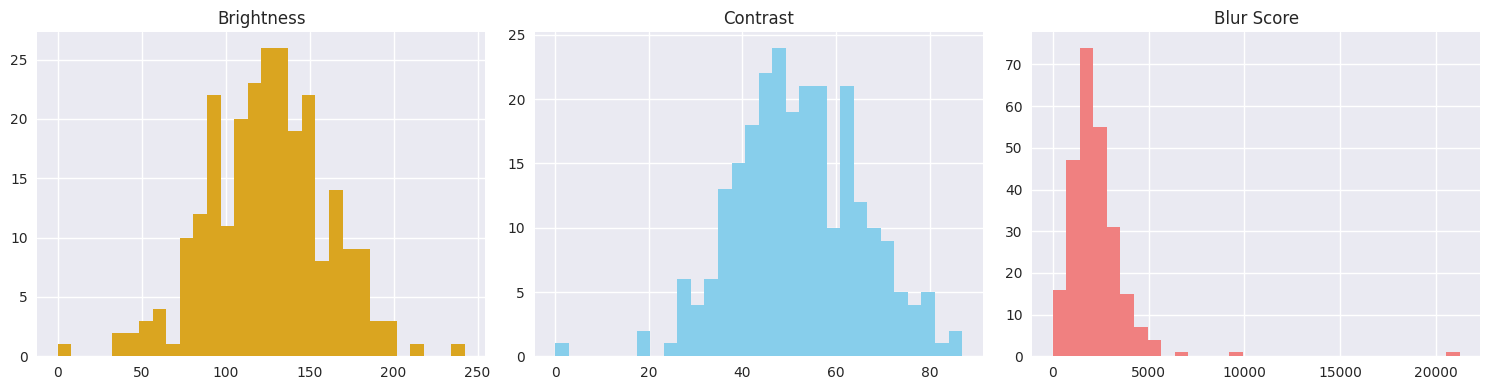

In [14]:
# histograms for Quality Analysis

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df_quality['brightness'].hist(bins=30, ax=axes[0], color='goldenrod'); axes[0].set_title('Brightness')
df_quality['contrast'].hist(bins=30, ax=axes[1], color='skyblue'); axes[1].set_title('Contrast')
df_quality['blur_score'].hist(bins=30, ax=axes[2], color='lightcoral'); axes[2].set_title('Blur Score')
plt.tight_layout()
plt.show()
